In [2]:
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)



/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
print(model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [4]:
for name, layer in model.named_modules():
    print(name)




embeddings
embeddings.word_embeddings
embeddings.position_embeddings
embeddings.token_type_embeddings
embeddings.LayerNorm
embeddings.dropout
encoder
encoder.layer
encoder.layer.0
encoder.layer.0.attention
encoder.layer.0.attention.self
encoder.layer.0.attention.self.query
encoder.layer.0.attention.self.key
encoder.layer.0.attention.self.value
encoder.layer.0.attention.self.dropout
encoder.layer.0.attention.output
encoder.layer.0.attention.output.dense
encoder.layer.0.attention.output.LayerNorm
encoder.layer.0.attention.output.dropout
encoder.layer.0.intermediate
encoder.layer.0.intermediate.dense
encoder.layer.0.intermediate.intermediate_act_fn
encoder.layer.0.output
encoder.layer.0.output.dense
encoder.layer.0.output.LayerNorm
encoder.layer.0.output.dropout
encoder.layer.1
encoder.layer.1.attention
encoder.layer.1.attention.self
encoder.layer.1.attention.self.query
encoder.layer.1.attention.self.key
encoder.layer.1.attention.self.value
encoder.layer.1.attention.self.dropout
encoder.

In [5]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params}")


Total Parameters: 109482240


In [6]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Requires Grad: {param.requires_grad}")


Layer: embeddings.word_embeddings.weight | Size: torch.Size([30522, 768]) | Requires Grad: True
Layer: embeddings.position_embeddings.weight | Size: torch.Size([512, 768]) | Requires Grad: True
Layer: embeddings.token_type_embeddings.weight | Size: torch.Size([2, 768]) | Requires Grad: True
Layer: embeddings.LayerNorm.weight | Size: torch.Size([768]) | Requires Grad: True
Layer: embeddings.LayerNorm.bias | Size: torch.Size([768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.query.weight | Size: torch.Size([768, 768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.query.bias | Size: torch.Size([768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.key.weight | Size: torch.Size([768, 768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.key.bias | Size: torch.Size([768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.value.weight | Size: torch.Size([768, 768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.valu

In [7]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [8]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Requires Grad: {param.requires_grad}")


Layer: embeddings.word_embeddings.weight | Size: torch.Size([30522, 768]) | Requires Grad: True
Layer: embeddings.position_embeddings.weight | Size: torch.Size([512, 768]) | Requires Grad: True
Layer: embeddings.token_type_embeddings.weight | Size: torch.Size([2, 768]) | Requires Grad: True
Layer: embeddings.LayerNorm.weight | Size: torch.Size([768]) | Requires Grad: True
Layer: embeddings.LayerNorm.bias | Size: torch.Size([768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.query.weight | Size: torch.Size([768, 768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.query.bias | Size: torch.Size([768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.key.weight | Size: torch.Size([768, 768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.key.bias | Size: torch.Size([768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.value.weight | Size: torch.Size([768, 768]) | Requires Grad: True
Layer: encoder.layer.0.attention.self.valu

In [9]:
import pandas as pd
import numpy as np
df=pd.read_csv("/home/aakash/Documents/COding/BerFIneTuning/archive/all-data.csv",encoding='ISO-8859-1')
df.columns=['Sentiment','Text']
df.head()

,Sentiment,Text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [10]:
df.isnull().sum()

Sentiment    0
Text         0
dtype: int64

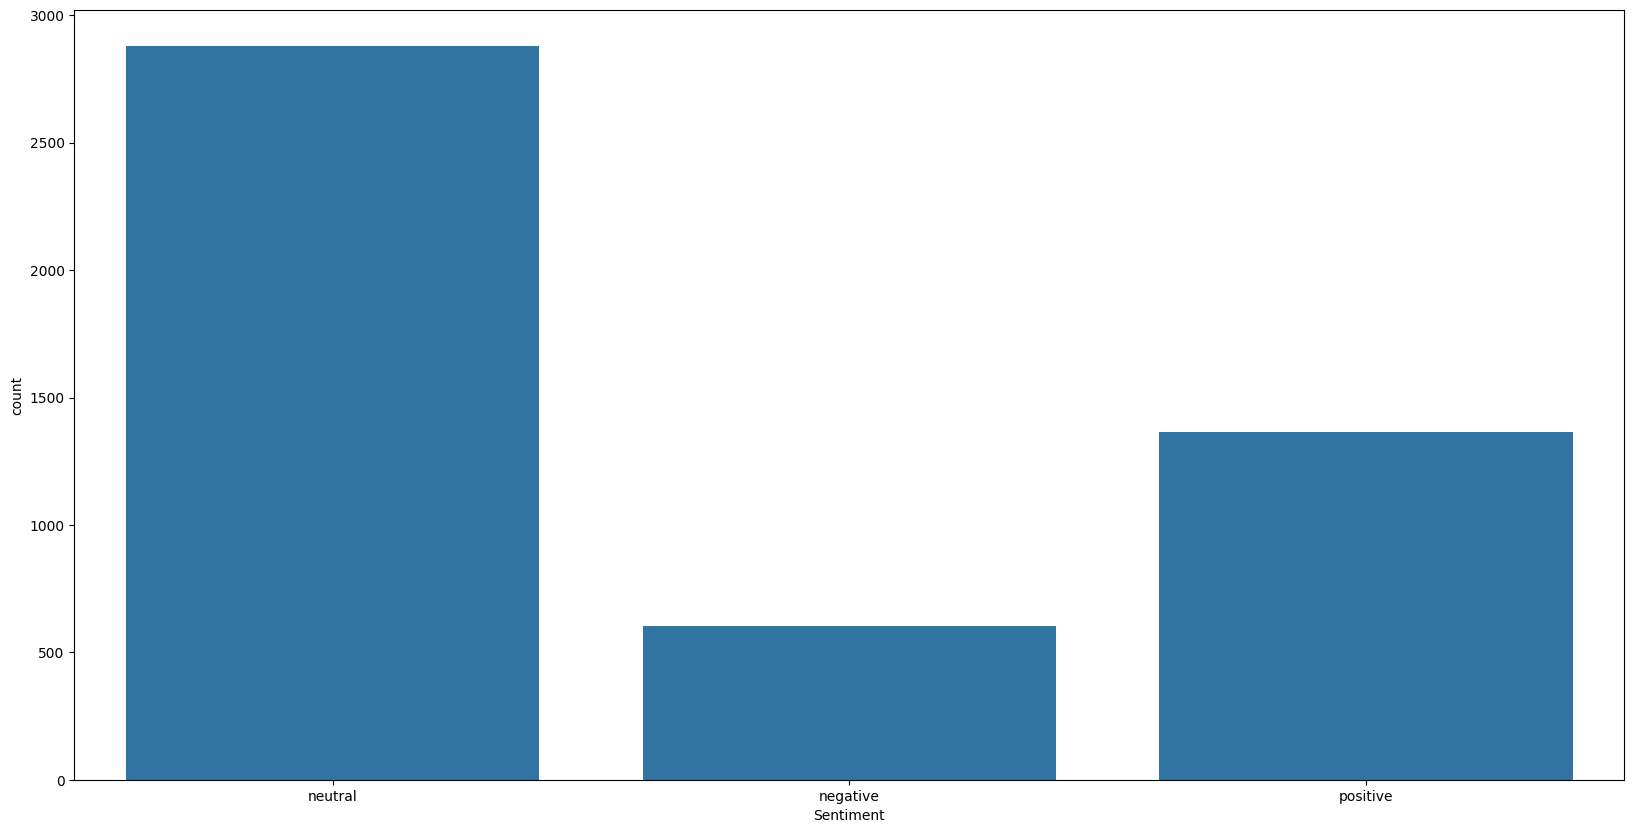

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x='Sentiment',data=df)
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Sentiment']=le.fit_transform(df['Sentiment'])
df.head()

x=df['Sentiment'].values
Y=df['Text'].values
print(x)
print(Y)


[1 0 2 ... 0 0 0]
['Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .'
 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .'
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .'
 ...
 'Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .'
 'Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .'

In [13]:

from sklearn.model_selection import train_test_split

train_text,val_text,train_label,val_label=train_test_split(df['Text'],df['Sentiment'],test_size=0.2,random_state=42)

tokeizer=BertTokenizer.from_pretrained('bert-base-uncased')
print(train_text[0])
print(type(train_text))


Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
<class 'pandas.core.series.Series'>


/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
maxi=128

def tokenize(text):
    return tokenizer(list(text),padding=True,truncation=True,max_length=maxi,return_tensors='pt')


train_encoding=tokenize(train_text)
val_encoding=tokenize(val_text)

print(type(train_encoding))






<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [20]:
import torch
from torch.utils.data import DataLoader,Dataset
import pandas as pd
import random

from transformers import BertTokenizer,BertForSequenceClassification,AdamW,get_linear_schedule_with_warmup
import os
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm

class FinancialPhrase:
    def __init__(self,encoding,labels):
        self.encodings=encoding
        self.labels=labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self,idx):
        item={key:tensor[idx] for key,tensor in self.encodings.items()}
        item['labels']=torch.tensor(self.labels[idx])
        return item
    

train_dataset=FinancialPhrase(train_encoding,train_label)
val_dataset=FinancialPhrase(val_encoding,val_label)
print(train_dataset)
batch=16

train=DataLoader(train_dataset,batch_size=batch,shuffle=True)
val=DataLoader(val_dataset,batch_size=batch,shuffle=True)
model=BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=3,output_attentions=False,output_hidden_states=False)
model.to(device)


optimizer=AdamW(model.parameters(),lr=2e-5,eps=1e-8)
epoch=2
total_steps=len(train)*epoch

scheduler=get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=total_steps)

def flat_accuracy(preds,labels):
    pred_flat=np.argmax(preds,axis=1).flatten()
    labelsflat=np.argmax(preds,axis=1).flatten()
    return np.sum(pred_flat == labelsflat)/len(labelsflat)

for ep in range(epoch):

    print(f'\n=====epoch{ep+1} / {epoch}')
    print('TRaning=====')

    model.train()
    train_loss=0
    train_accuray=0

    for batch in tqdm(train,desc='Training'):
        batch={k:v.to(device) for k,v in batch.items()}
        model.zero_grad()

        outputs=model(**batch)
        loss=outputs.loss
        logits=outputs.logits
        train_loss +=loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(),max_norm=0.1)
        optimizer.step()
        scheduler.step()
        logits=logits.detach().cpu().numpy()
        label_ids=batch['labels'].cpu().numpy()
        train_accuray+=flat_accuracy(logits,label_ids)
    avg_train_loss=train_loss/len(train)
    avg_train_accuracy=train_accuray/len(train)

    print(f"TRaingloss: {avg_train_loss:.4f}")
    print(f"TRainign accuracy: {avg_train_accuracy:.4f}")



    print("Running Validation")
    model.eval()
    total_val_loss=0
    total_val_accuracy=0
    all_preds=[]
    all_labels=[]
    with torch.no_grad():
        for batch in tqdm(val,des='Validation'):
            batch={k:v.to(device) for k,v in batch.items()}
            outputs=model(**batch)
            loss=outputs.loss
            logits=outputs.logits
            total_val_loss+=loss.item()
            logits=logits.detach().cpu().numpy()
            label_ids=batch['labels'].cpu().numpy()
            total_val_accuracy+=flat_accuracy(logits,label_ids)

            all_preds.extend(np.argmax(logits,axis=1).flatten())
            all_labels.extend(label_ids.flatten())
    avg_val_loss=total_val_loss/len(val)
    avg_val_accuracy=total_val_accuracy/len(val)
    print(f"Validation loss : {avg_train_loss:.4f}")
    print(f"Validation accuracy : {avg_train_accuracy:.4f}")
    
    print("classifcication report")
    print(classification_report(all_labels,all_preds))
with torch.no_grad():
    for batch in val:
        batch={k:v.to(device) for k,v in batch.items()}
        outputs=model(**batch)
        logits=outputs.logits
        preds=torch.argmax(logits,dim=1).cpu().numpy()
        labels=batch['labels'].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)

accuracy=accuracy_score(all_labels,all_preds)
print(f'\nFinal Validation Accuracy: {accuracy:.4f}')

print("classification report")
print(classification_report(all_labels,all_preds))


      

import matplotlib.pyplot as plt


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



=====epoch1 / 2
TRaning=====


Training:   0%|          | 0/243 [00:00<?, ?it/s]


KeyError: 3765

In [22]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import random
import os

# Set the seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed()

# Check if GPU is available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device: {device}')

# Load the dataset
#df = pd.read_csv('path_to_your_financial_phrase_bank.csv')

df=pd.read_csv("/home/aakash/Documents/COding/BerFIneTuning/archive/all-data.csv",encoding='ISO-8859-1')
df.columns=['Sentiment','Sentence']
# Example columns: 'Sentence', 'Sentiment'
print(df.head())

# Define the sentiment labels
label_mapping = {
    'positive': 0,
    'negative': 1,
    'neutral': 2
}

df['label'] = df['Sentiment'].map(label_mapping)

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Sentence'].values,
    df['label'].values,
    test_size=0.1,
    random_state=42,
    stratify=df['label'].values
)

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the texts
max_length = 128  # Adjust based on your data

def tokenize_texts(texts):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

train_encodings = tokenize_texts(train_texts)
val_encodings = tokenize_texts(val_texts)

class FinancialPhraseDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: tensor[idx] for key, tensor in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create Dataset objects
train_dataset = FinancialPhraseDataset(train_encodings, train_labels)
val_dataset = FinancialPhraseDataset(val_encodings, val_labels)

# Create DataLoaders
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,
    output_attentions=False,
    output_hidden_states=False
)

model.to(device)

# Initially freeze all BERT layers except the classification head
for param in model.bert.parameters():
    param.requires_grad = False

# Define optimizer to include only trainable parameters
optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-5, eps=1e-8)

# Number of training steps
epochs = 6  # Increased to allow for layer-wise unfreezing
total_steps = len(train_loader) * epochs

# Define the scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # 10% warm-up
    num_training_steps=total_steps
)

# Function to calculate accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Function to unfreeze layers progressively
def unfreeze_layers(model, epoch, total_epochs, total_layers):
    """
    Unfreeze layers progressively based on the current epoch.
    
    Parameters:
    - model: The BertForSequenceClassification model
    - epoch: Current epoch number
    - total_epochs: Total number of epochs
    - total_layers: Total number of BERT encoder layers
    """
    layers_to_unfreeze = int((epoch / total_epochs) * total_layers)
    if layers_to_unfreeze > 0:
        for layer in model.bert.encoder.layer[-layers_to_unfreeze:]:
            for param in layer.parameters():
                param.requires_grad = True
        print(f'\nUnfroze the top {layers_to_unfreeze} layers.')

# Training loop with layer-wise unfreezing
for epoch in range(1, epochs + 1):
    print(f'\n======== Epoch {epoch} / {epochs} ========')
    print('Training...')
    
    # Unfreeze layers progressively
    total_layers = len(model.bert.encoder.layer)
    unfreeze_layers(model, epoch, epochs, total_layers)
    
    # Update optimizer to include newly trainable parameters
    optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-5, eps=1e-8)
    
    # Reinitialize scheduler with the new optimizer
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(0.1 * total_steps),  # 10% warm-up
        num_training_steps=total_steps
    )
    
    model.train()
    total_train_loss = 0
    total_train_accuracy = 0
    
    for batch in tqdm(train_loader, desc="Training"):
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}
        
        # Clear previously calculated gradients
        model.zero_grad()
        
        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss
        logits = outputs.logits
        
        # Accumulate the training loss
        total_train_loss += loss.item()
        
        # Backward pass
        loss.backward()
        
        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Update parameters
        optimizer.step()
        scheduler.step()
        
        # Calculate accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = batch['labels'].cpu().numpy()
        total_train_accuracy += flat_accuracy(logits, label_ids)
    
    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = total_train_accuracy / len(train_loader)
    
    print(f'\nAverage training loss: {avg_train_loss:.4f}')
    print(f'Average training accuracy: {avg_train_accuracy:.4f}')
    
    # Validation
    print('\nRunning Validation...')
    model.eval()
    total_val_loss = 0
    total_val_accuracy = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            batch = {k: v.to(device) for k, v in batch.items()}
            
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits
            
            total_val_loss += loss.item()
            
            logits = logits.detach().cpu().numpy()
            label_ids = batch['labels'].cpu().numpy()
            
            total_val_accuracy += flat_accuracy(logits, label_ids)
            
            all_preds.extend(np.argmax(logits, axis=1).flatten())
            all_labels.extend(label_ids.flatten())
    
    avg_val_loss = total_val_loss / len(val_loader)
    avg_val_accuracy = total_val_accuracy / len(val_loader)
    print(f'Validation Loss: {avg_val_loss:.4f}')
    print(f'Validation Accuracy: {avg_val_accuracy:.4f}')
    
    # Detailed classification report
    print('\nClassification Report:')
    print(classification_report(all_labels, all_preds, target_names=label_mapping.keys()))


Using device: cuda
  Sentiment                                           Sentence
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to di


======== Epoch 1 / 6 ========
Training...

Unfroze the top 2 layers.


Training: 100%|██████████| 273/273 [01:51<00:00,  2.45it/s]



Average training loss: 0.8836
Average training accuracy: 0.5694

Running Validation...


Validation: 100%|██████████| 31/31 [00:09<00:00,  3.33it/s]
/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Validation Loss: 0.5741
Validation Accuracy: 0.7815

Classification Report:
              precision    recall  f1-score   support

    positive       0.66      0.63      0.65       136
    negative       0.80      0.72      0.76        61
     neutral       0.84      0.87      0.85       288

    accuracy                           0.79       485
   macro avg       0.77      0.74      0.75       485
weighted avg       0.78      0.79      0.78       485


======== Epoch 2 / 6 ========
Training...

Unfroze the top 4 layers.


Training: 100%|██████████| 273/273 [02:08<00:00,  2.12it/s]



Average training loss: 0.5068
Average training accuracy: 0.7960

Running Validation...


Validation: 100%|██████████| 31/31 [00:08<00:00,  3.58it/s]
/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Validation Loss: 0.3887
Validation Accuracy: 0.8484

Classification Report:
              precision    recall  f1-score   support

    positive       0.78      0.80      0.79       136
    negative       0.79      0.90      0.84        61
     neutral       0.90      0.86      0.88       288

    accuracy                           0.85       485
   macro avg       0.82      0.85      0.84       485
weighted avg       0.85      0.85      0.85       485


======== Epoch 3 / 6 ========
Training...

Unfroze the top 6 layers.


Training: 100%|██████████| 273/273 [02:44<00:00,  1.66it/s]



Average training loss: 0.3542
Average training accuracy: 0.8624

Running Validation...


Validation: 100%|██████████| 31/31 [00:07<00:00,  4.17it/s]
/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Validation Loss: 0.3799
Validation Accuracy: 0.8403

Classification Report:
              precision    recall  f1-score   support

    positive       0.80      0.70      0.75       136
    negative       0.75      0.90      0.82        61
     neutral       0.88      0.90      0.89       288

    accuracy                           0.84       485
   macro avg       0.81      0.83      0.82       485
weighted avg       0.84      0.84      0.84       485


======== Epoch 4 / 6 ========
Training...

Unfroze the top 8 layers.


Training: 100%|██████████| 273/273 [01:08<00:00,  4.00it/s]



Average training loss: 0.2639
Average training accuracy: 0.9064

Running Validation...


Validation: 100%|██████████| 31/31 [00:03<00:00,  9.78it/s]
/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Validation Loss: 0.3787
Validation Accuracy: 0.8665

Classification Report:
              precision    recall  f1-score   support

    positive       0.85      0.76      0.80       136
    negative       0.87      0.87      0.87        61
     neutral       0.88      0.92      0.90       288

    accuracy                           0.87       485
   macro avg       0.86      0.85      0.86       485
weighted avg       0.87      0.87      0.87       485


======== Epoch 5 / 6 ========
Training...

Unfroze the top 10 layers.


Training: 100%|██████████| 273/273 [01:18<00:00,  3.46it/s]



Average training loss: 0.1980
Average training accuracy: 0.9281

Running Validation...


Validation: 100%|██████████| 31/31 [00:03<00:00,  9.77it/s]
/home/aakash/miniconda3/envs/test/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Validation Loss: 0.4456
Validation Accuracy: 0.8403

Classification Report:
              precision    recall  f1-score   support

    positive       0.72      0.88      0.79       136
    negative       0.83      0.87      0.85        61
     neutral       0.92      0.82      0.87       288

    accuracy                           0.84       485
   macro avg       0.82      0.85      0.84       485
weighted avg       0.85      0.84      0.84       485


======== Epoch 6 / 6 ========
Training...

Unfroze the top 12 layers.


Training: 100%|██████████| 273/273 [01:29<00:00,  3.04it/s]



Average training loss: 0.1417
Average training accuracy: 0.9574

Running Validation...


Validation: 100%|██████████| 31/31 [00:03<00:00,  9.68it/s]

Validation Loss: 0.5400
Validation Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

    positive       0.76      0.86      0.81       136
    negative       0.85      0.87      0.86        61
     neutral       0.92      0.86      0.89       288

    accuracy                           0.86       485
   macro avg       0.85      0.86      0.85       485
weighted avg       0.87      0.86      0.87       485

